# Challenge 3

In [3]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [17]:
# your code here- numerical variable
df_num = titanic.select_dtypes(include = "number")
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [18]:
#your code here- categorical variable
df_cat = titanic.select_dtypes(include = "object")
df_cat.dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [20]:
# your code here

with plt.style.context(("classic")):
    plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

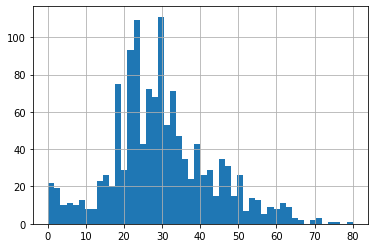

In [22]:
# your code here

titanic["Age"].hist(bins=50)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

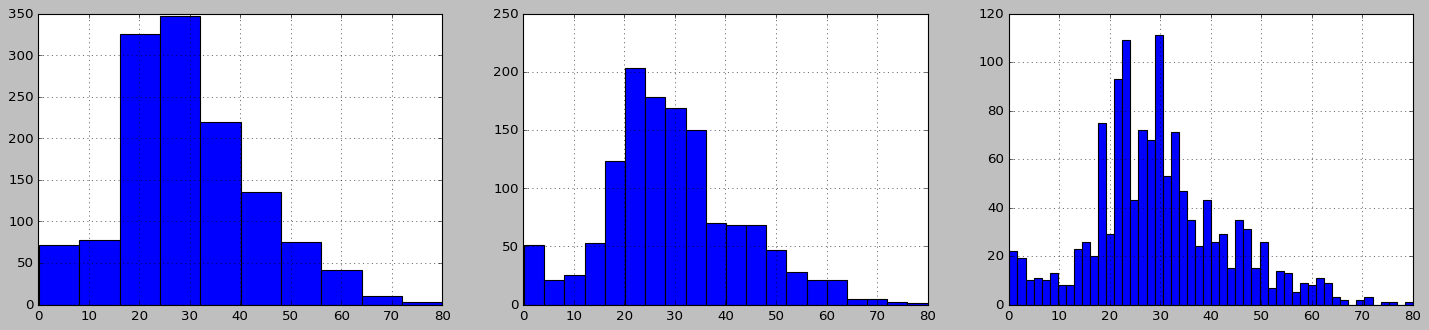

In [41]:
# your code here

with plt.style.context(("classic")):
    plt.figure(figsize=(30, 10))
    plt.subplot(2,4,1)
    titanic['Age'].hist(bins=10)
    plt.subplot(2,4,2)
    titanic['Age'].hist(bins=20)
    plt.subplot(2,4,3)
    titanic['Age'].hist(bins=50)

#### Whether the bin size affects your plot? Why?

#your comment here
The bin size make the appearence of plots different as we increase itsvalue. The bigger the size of the bin, the bigger the detail for each value. From left to right, we can see that we can read the graphs from a "overall" perspective to a "indetail" one.

#### Use seaborn to show the distribution of the column `Age`

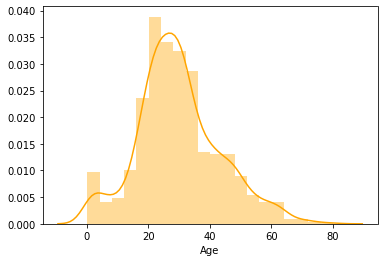

In [29]:
# your code here

sns.distplot(titanic['Age'], bins=20,kde=True,color='orange') #I added the fitting line because I tried to insert it in
                                                              # Challenge one unsuccessfully

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

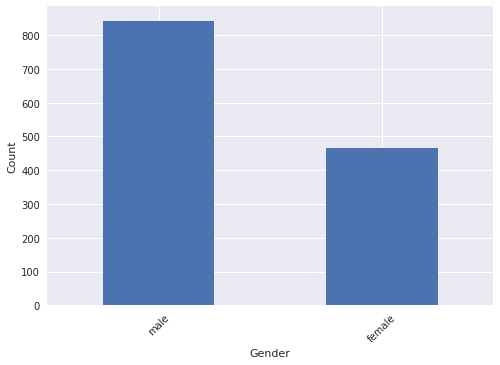

In [33]:
# your code here- 1st way
with plt.style.context(("seaborn")):
    titanic["Gender"].value_counts().plot(kind = "bar")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)

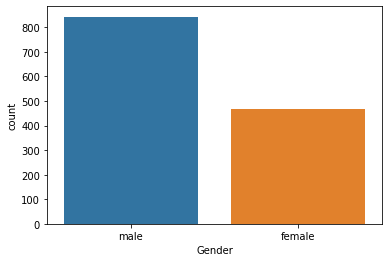

In [34]:
# your code here- 2nd way

sns.countplot(x = "Gender", data = titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


In [36]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

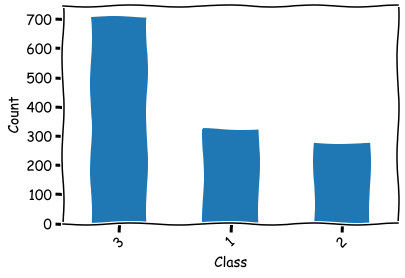

In [39]:
# your code here
with plt.xkcd():
    titanic["Pclass"].value_counts().plot(kind = "bar")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

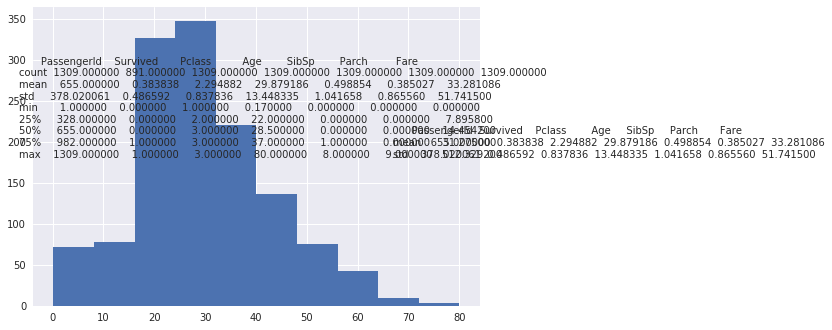

In [42]:
# your code here
with plt.style.context(("seaborn")):    
    fig, ax = plt.subplots()
    ax.hist(titanic["Age"])
    plt.figtext(0.1,0.5, titanic.describe().to_string())
    plt.figtext(0.75,0.5, titanic.describe().loc[['mean','std']].to_string())    

#### What does the previous plot tell you about the feature `Age`? Comment.

In [1]:
# your comment here
# I choose this option to represent the serie Age, however, when it comes to add the stats, it doesn't relocate to the graph

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

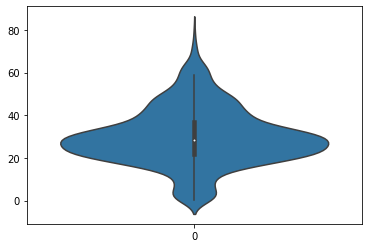

In [43]:
#your code here violinplot

sns.violinplot(data = titanic["Age"])


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# This graph is as useful as a demographic piramid, we can check how the population distributes through the ages.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

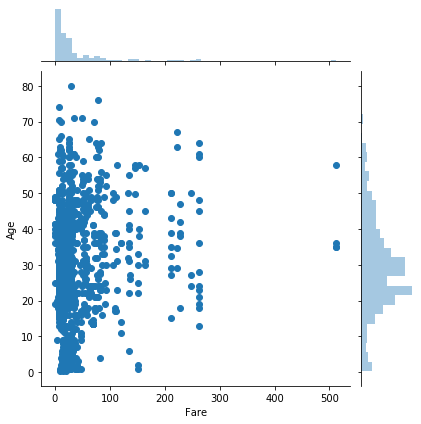

In [5]:
#your code-1st way
sns.jointplot(x = 'Fare', y = 'Age', data = titanic)

In [9]:
# your code-2nd way
# Este código no funciona, tengo que revisarlo para reprsentar un join con matplotlib
from matplotlib import jointplot
    tips = titanic["Fare"]
    data = np.c_[tips['Fare'].values,tips['Age'].values]
    jointPlot(data, kde=True)
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))

ImportError: cannot import name 'jointplot'

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [ ]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
